In [2]:
# Check dataframe structure
import dask.dataframe as dd
from dask.distributed import Client

dask_df = dd.read_csv('~/Downloads/bike-sharing-demand/*.csv')
dask_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
npartitions=3,,,,,,,,,
,object,int64,int64,int64,int64,float64,float64,int64,float64
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...


In [3]:
# Understand variables
dask_train = dd.read_csv('~/Downloads/bike-sharing-demand/bike_train.csv')
dask_test = dd.read_csv('~/Downloads/bike-sharing-demand/bike_test.csv')

dask_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Check duplicate values
import pandas as pd
train = pd.read_csv('~/Downloads/bike-sharing-demand/bike_train.csv')
test = pd.read_csv('~/Downloads/bike-sharing-demand/bike_test.csv')

sum(train.duplicated()) + sum(test.duplicated())

0

In [5]:
# Check missing values (1)
train.isna().sum()
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [6]:
# Check missing values (2)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 n

<AxesSubplot:title={'center':'Correlation between variables'}>

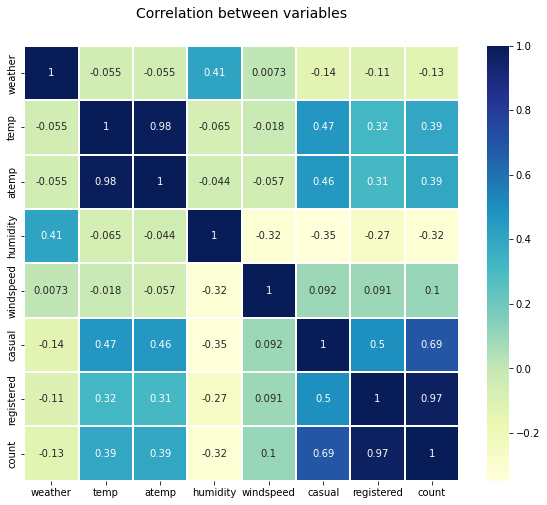

In [7]:
# Correlation between variables
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('~/Downloads/bike-sharing-demand/bike_train.csv')
colormap = plt.cm.YlGnBu
plt.figure(figsize=(10,8))
plt.title("Correlation between variables", y=1.05, size=14)
sns.heatmap(train[['weather','temp','atemp','humidity','windspeed','casual','registered','count']].corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor="white",annot=True,annot_kws={"size":10})

In [8]:
# Create a dask client if you want to use the dashboard

client = Client()
client.restart()

/Users/SongYoungOh/opt/anaconda3/lib/python3.9/site-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 60436 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:60436/status,
Dashboard: http://127.0.0.1:60436/status,Workers: 5
Total threads: 10,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:60437,Workers: 5
Dashboard: http://127.0.0.1:60436/status,Total threads: 10
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:60486,Total threads: 2
Dashboard: http://127.0.0.1:60487/status,Memory: 3.20 GiB
Nanny: tcp://127.0.0.1:60440,
